In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [9]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

In [28]:
len(xtrain)

60000

In [29]:
len(ytrain)

60000

In [30]:
len(xtest)

10000

In [31]:
xtrain.shape

(60000, 28, 28)

In [18]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [33]:
xtrain=xtrain/225
xtest=xtest/225

In [34]:
xtrain_flattened=xtrain.reshape(len(xtrain),28*28)
xtest_flattened=xtest.reshape(len(xtest),28*28)

In [35]:
xtrain_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [36]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(xtrain_flattened,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4514 - accuracy: 0.8811
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3003 - accuracy: 0.9163
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2811 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2720 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2651 - accuracy: 0.9261


In [38]:
model.evaluate(xtest_flattened,ytest)

313/313 [==============================] - 1s 1ms/step - loss: 0.2647 - accuracy: 0.9260


[0.2647377550601959, 0.9259999990463257]

In [40]:
y_pred=model.predict(xtest_flattened)

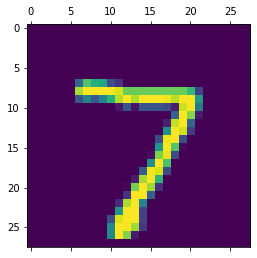

In [42]:
plt.matshow(xtest[0])

In [41]:
y_pred[0]

array([1.9993991e-02, 2.2705885e-07, 6.8737358e-02, 9.6155649e-01,
       3.5192966e-03, 1.7324588e-01, 1.4324200e-06, 9.9982715e-01,
       1.4170846e-01, 7.0895725e-01], dtype=float32)

In [43]:
np.argmax(y_pred[0])

7

In [46]:
y_pred_lbael=[np.argmax(i) for i in y_pred]
y_pred_lbael[:5]

[7, 2, 1, 0, 4]

In [47]:
cm=tf.math.confusion_matrix(labels=ytest,predictions=y_pred_lbael)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    2,    2,    0,    7,   10,    2,    2,    1],
       [   0, 1107,    4,    2,    0,    1,    4,    2,   15,    0],
       [   3,    6,  929,   15,    8,    4,   13,   10,   40,    4],
       [   2,    0,   24,  913,    1,   27,    3,    9,   25,    6],
       [   1,    1,    6,    1,  920,    0,    9,    3,   10,   31],
       [   8,    2,    2,   25,   10,  791,   16,    3,   29,    6],
       [   9,    3,    5,    1,    8,   14,  913,    2,    3,    0],
       [   1,    5,   24,    4,    9,    1,    0,  942,    4,   38],
       [   5,    6,    7,   17,    9,   28,   10,   11,  875,    6],
       [  10,    7,    1,    9,   27,    7,    0,   24,    8,  916]])>

Text(69.0, 0.5, 'truth')

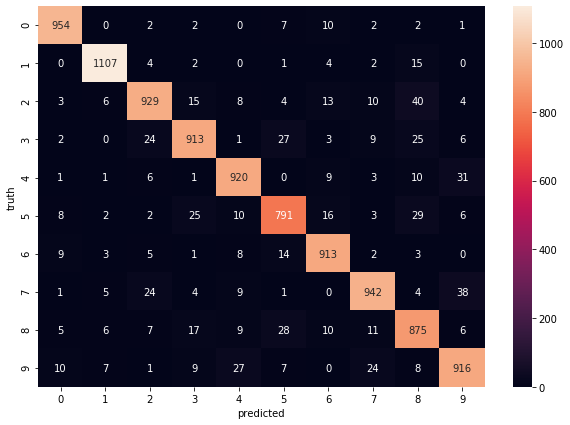

In [49]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [51]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(xtrain_flattened,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2639 - accuracy: 0.9243
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1175 - accuracy: 0.9648
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0826 - accuracy: 0.9755
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0622 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0484 - accuracy: 0.9852


In [58]:
model.evaluate(xtest_flattened,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0857 - accuracy: 0.9746


[0.08572959899902344, 0.9746000170707703]

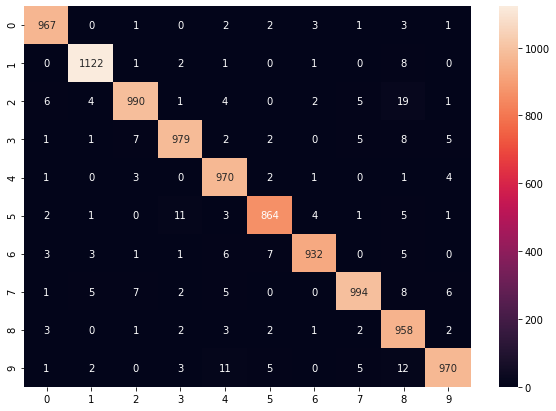

In [60]:
y_predd=model.predict(xtest_flattened)
ypred_label=[np.argmax(i) for i in y_predd]
cmm=tf.math.confusion_matrix(labels=ytest,predictions=ypred_label)
plt.figure(figsize=(10,7))
sns.heatmap(cmm,annot=True,fmt='d')

In [64]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2649 - accuracy: 0.9245
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1198 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0832 - accuracy: 0.9755
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0644 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0503 - accuracy: 0.9844


In [65]:
model.evaluate(xtest_flattened,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0853 - accuracy: 0.9757


[0.0852922573685646, 0.9757000207901001]